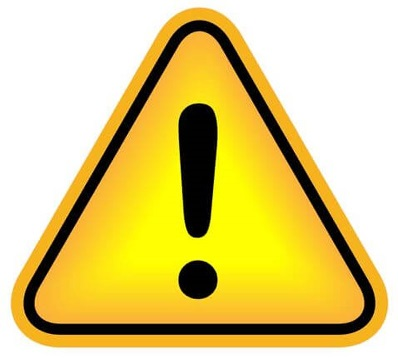

DO NOT CONNECT TO GPU IN RUNTIME!

DO NOT CONNECT TO GPU IN RUNTIME!

DO NOT CONNECT TO GPU IN RUNTIME!

JUST CONNECT TO NOTHING! 

In [1]:
#Get Duck Hunt installation files
!wget https://github.com/dash-uvic/ece471_536-S2022/raw/main/duck-hunt/ece471_duckhunt-1.1.0-cp37-cp37m-linux_x86_64.whl
!wget https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/duck-hunt/requirements.txt
# Replace Amanda's solution with our solution.py in another cell
#!wget https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/duck-hunt/solution.py


--2022-04-05 23:15:54--  https://github.com/dash-uvic/ece471_536-S2022/raw/main/duck-hunt/ece471_duckhunt-1.1.0-cp37-cp37m-linux_x86_64.whl
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/duck-hunt/ece471_duckhunt-1.1.0-cp37-cp37m-linux_x86_64.whl [following]
--2022-04-05 23:15:54--  https://raw.githubusercontent.com/dash-uvic/ece471_536-S2022/main/duck-hunt/ece471_duckhunt-1.1.0-cp37-cp37m-linux_x86_64.whl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35243078 (34M) [application/octet-stream]
Saving to: ‘ece471_duckhunt-1.1.0-cp37-cp37m-linux_x86_64.whl’

ece47

In [2]:
#Install required files
!pip install -r requirements.txt
!pip install ece471_duckhunt-1.1.0-cp37-cp37m-linux_x86_64.whl
!pip install torch==1.8.1+cu111 torchvision==0.9.1+cu111 torchaudio===0.8.1 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html
!git clone https://github.com/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt --upgrade

     |████████████████████████████████| 21.8 MB 88.1 MB/s 
     |████████████████████████████████| 60.5 MB 59 kB/s 
     |████████████████████████████████| 1.6 MB 56.6 MB/s 
     |████████████████████████████████| 102 kB 64.5 MB/s 
     |████████████████████████████████| 47.8 MB 1.7 MB/s 
  Created wheel for gym: filename=gym-0.18.0-py3-none-any.whl size=1656449 sha256=68825a61c6da6dd5f6c7c547266050d85c48ebd46a174d2f0eb557b356574586
  Stored in directory: /root/.cache/pip/wheels/99/f7/e3/d6f0f120ac047c1e5de2ae34930e7bf6e8de1c7a4d5fa68555
Successfully built gym
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: gym
    Found e

In [3]:
!pip install ipywidgets

In [4]:
# The Google Colab doesn't have a visual display, so we need to fake one. 
import cv2
from google.colab.patches import cv2_imshow
from google.colab import output
import time 
import os, sys



In [23]:
# Solution.py content
import torch
import numpy as np
from torchvision.utils import draw_bounding_boxes
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F

# Download our model
if os.path.isfile("best.pt"):
  os.remove("best.pt")
!wget https://duckhunt-proof.s3.us-west-2.amazonaws.com/models/0405/best.pt

# Load the model
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')  # default

model.conf = 0.50 # threshold for the confidence score
model.agnostic = True
model.max_det = 2

def GetLocation(current_frame):

    # convert current_frame to grayscale (for easier processing)
    current_frame = cv2.cvtColor(current_frame, cv2.COLOR_BGR2GRAY)

    # rotate the image 270 degrees (I think this is required for the model to work)
    current_frame = np.rot90(current_frame, k=3)

    # flip the image horizontally (IMPORTANT: this is definitely needed for the model to work)
    current_frame = np.fliplr(current_frame)

    # Inference
    results = model(current_frame)
    #results.save()
    # extract the coordinates
    boxes = results.xyxy[0]

    # sort the boxes based on the confidence score
    boxes = sorted(boxes, key=lambda x: x[4], reverse=True)
    # find center of bounding boxes in boxes
    move_list = []
    for box in boxes:
        x = int((box[0] + box[2])/2)
        y = int((box[1] + box[3])/2)

        #return [{"coordinate" : (x, y), 'move_type' : "absolute"}]
        # add the coordinates to the move list
        move_list.append({"coordinate" : (x, y), 'move_type' : "absolute"})

    if len(move_list) > 0:
        return move_list

    # duck not found
    #results.save() # save the results for debugging purposes
    return [{"coordinate" : (0, 0), 'move_type' : "absolute"}]

--2022-04-06 04:24:07--  https://duckhunt-proof.s3.us-west-2.amazonaws.com/models/0405/best.pt
Resolving duckhunt-proof.s3.us-west-2.amazonaws.com (duckhunt-proof.s3.us-west-2.amazonaws.com)... 52.218.182.137
Connecting to duckhunt-proof.s3.us-west-2.amazonaws.com (duckhunt-proof.s3.us-west-2.amazonaws.com)|52.218.182.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14277829 (14M) [binary/octet-stream]
Saving to: ‘best.pt’

best.pt             100%[===================>]  13.62M  13.9MB/s    in 1.0s    

2022-04-06 04:24:08 (13.9 MB/s) - ‘best.pt’ saved [14277829/14277829]



Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
requirements: PyYAML>=5.3.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 1 package updated per /root/.cache/torch/hub/ultralytics_yolov5_master/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 2022-4-5 torch 1.8.1+cu111 CPU

Fusing layers... 
Model summary: 213 layers, 7015519 parameters, 0 gradients
Adding AutoShape... 


In [6]:
import argparse
import gym
import cv2
import numpy as np
import pygame
import time
from concurrent.futures import ThreadPoolExecutor

import ece471_duckhunt as dh
from ece471_duckhunt import envs
from ece471_duckhunt.envs import duckhunt_env

#from solution import GetLocation

# Required version for the following packages
print(f"Duck Hunt version: {dh.__version__} (=1.0.0)")
print(f"OpenCV version: {cv2.__version__} (=4.X)")
print(f"NumPy version: {np.__version__} (=1.19+)")
print(f"OpenGym version: {gym.__version__} (=0.18.0)")


pygame 2.1.2 (SDL 2.0.16, Python 3.7.13)
Hello from the pygame community. https://www.pygame.org/contribute.html
Duck Hunt version: 1.0.0 (=1.0.0)
OpenCV version: 4.5.5 (=4.X)
NumPy version: 1.21.5 (=1.19+)
OpenGym version: 0.18.0 (=0.18.0)


In [7]:
#Run main animation loop
# No thread version by Avni
#NOTE: I am not creating a threaded operation, see duck_hunt_main.py for demo code
""" 
Use the `current_frame` from either env.step of env.render
to determine where to move the scope.

current_frame : np.ndarray (width, height, 3), np.uint8, RGB
"""

#Fake a video card
os.environ["SDL_VIDEODRIVER"] = "dummy"


#Construct the Duck Hunt Environment
env = gym.make("DuckHunt-v0",
                    move_amount=1,
                    quiet=False,
                    level=1,
                    shape=(1024,798),
                    duration=60,
                    seed=None,
                    randomize=False,
                    )


game_done = True#False
#NOTE: bypassing this loop to use the threaded version in the next cell
while not game_done:
        train_start = time.time()

        """ 
        Use the `current_frame` from either env.step of env.render
        to determine where to move the scope.
        
        current_frame : np.ndarray (width, height, 3), np.uint8, RGB
        """
        current_frame = env.render() 
        output.clear()
        cv2_imshow(cv2.cvtColor(current_frame.transpose((1,0,2)), cv2.COLOR_RGB2BGR))
        
        
        #Using your algorithm, get a list of dictionaries with:
        # 'coordinate' : tuple or list (x,y) for absolute coordinates
        #                integer [0,8] for relative coordinates
        # 'move_type'  : type of move to perform
        results = GetLocation(current_frame)  

        """
        Pass the current location (and location type) you want the "gun" place.
        The action "shoot" is automatically done for you.
        Returns: 
                current_frame: np.dnarray (W,H,3), np.uint8, RGB: current frame after `coordinate` is applied.
                level_done: True if the current level is finished, False otw 
                game_done: True if all the levels are finished, False otw 
                info: dict containing current game information (see API guide)
        
        """
        for res in results:
            coordinate  = res['coordinate']
            move_type   = res['move_type']
            current_frame, level_done, game_done, info = env.step(coordinate, move_type)
            print(info)
            
            if level_done or game_done:
                if level_done:
                  print(f"Level done: {level_done}")
                if game_done:
                  print(f"Game done: {game_done}")
                break


Total number of scenes: 99
Level Set 1: levels 1-12
Level Set 2: levels 13-27
Level Set 3: levels 28-126
Level Set 4: levels 127-225
Level Set 5: levels 226-324
Level Set 6: levels 325-423
Level Set 7: levels 424-522
Level Set 8: levels 523-621
Level Set 9: levels 622-720
Level Set 10: levels 721-819
Total number of levels: 820
{'length': 60, 'max_birds': 1, 'bird_speed': <BirdSpeed.slow: 1>, 'scene': ('foreground_alpha', 'background_1'), 'moving': False, 'atmosphere': [False, False, False, False], 'augment': [False, False, False, False], 'bamboozle': False, 'sprite-augment': [False, False, False], 'randomize': False, 'wind': False}
Level 1


In [25]:
#Run main animation loop
#NOTE: Threaded version
from concurrent.futures import ThreadPoolExecutor
import multiprocessing as mp

#Fake a video card
os.environ["SDL_VIDEODRIVER"] = "dummy"
import pygame

""" If your algorithm isn't ready, it'll perform a NOOP """
def noop():
    return [{'coordinate' : 8, 'move_type' : 'relative'}]

""" 
Use the `current_frame` from either env.step of env.render
to determine where to move the scope.

current_frame : np.ndarray (width, height, 3), np.uint8, RGB
"""

""" Save the game as a GIF, for visualization purposes only!"""
from PIL import Image as PILImage
def save_gif(imgs, fn):
    pils = []
    for img in imgs:
        img = PILImage.fromarray(img)
        pils.append(img)

    pils[0].save(fn, save_all=True, append_images=pils[1:], duration=60, loop=0)



#NOTE: Once the game is over pygame is closed.  You need to re-create
# the game environment `env` before you can run another game.

def runGame(stats):
  frames = []
  indexer=1

  result = {}
  future = None
  #executor = ThreadPoolExecutor(max_workers=1)
  executor = mp.Pool(processes=4)

  game_done=False
  while not game_done:
          train_start = time.time()
          current_frame = env.render()
          
          """
          NOTE: This is a hack to display the scenes in Google Colab.
                I recommend using quiet=True or not displaying results
                and instead use Google Colab for training and your own computer
                for visualizing results
          """
          ##  convert from (width, height, channel) to (height, width, channel)
          #Display image, clear cell every 0.5 seconds
          #output.clear()
          #cv2_imshow(cv2.cvtColor(current_frame.transpose((1,0,2)), cv2.COLOR_RGB2BGR))
          
          #Saving the images for a GIF. 
          #Free Google Colab doesn't have enough resources for a 60s game so splitting
          #up the GIF. I didn't play with this so you could potentially increase it
          #Alternatively, you can save all frames to a mounted Google drive, and analyze
          #process them off-line
          #Or use a package like h5py and save and compress files as binary files
          frames.append(current_frame.transpose((1,0,2)))
          if len(frames) == 200:
              save_gif(frames, f"game_{indexer}.gif")
              frames = []
              indexer += 1

          #Using your algorithm, get a list of dictionaries with:
          # 'coordinate' : tuple or list (x,y) for absolute coordinates
          #                integer [0,8] for relative coordinates
          # 'move_type'  : type of move to perform
          
          if future is None:
              result = noop()
              future = executor.apply_async(GetLocation, args=(current_frame,))
          elif future.ready():
              result = future.get()
              future = None


          """
          Pass the current location (and location type) you want the "gun" place.
          The action "shoot" is automatically done for you.
          Returns: 
                  current_frame: np.dnarray (W,H,3), np.uint8, RGB: current frame after `coordinate` is applied.
                  level_done: True if the current level is finished, False otw 
                  game_done: True if all the levels are finished, False otw 
                  info: dict containing current game information (see API guide)
          
          """
          for res in result:
              coordinate  = res['coordinate']
              move_type   = res['move_type']
              current_frame, level_done, game_done, info = env.step(coordinate, move_type)
              """if (info['hits'] > 5):
                print(info)"""
              if level_done or game_done:
                print(f"Level done: {level_done}")
                print(f"Game done: {game_done}")
                  #input("Press key to continue")
                break

          if level_done:
            """ Indicates the level has finished. Any post-level cleanup your algorithm may need """
            executor.close()
            executor.join()
            executor.terminate()
            pass

          if game_done:
            """ All levels have finished."""
            print(info)
            stats.extend(list(info['scores'].values()))
            break
  """if len(frames) > 0:
    save_gif(frames, f"game_{indexer}.gif")"""

# Each level runs 60s, plus some overhead (~3s) for printing the result and the multi processing stuff
# loop through levels
stats = []
levels = []
levels = np.array((np.random.rand(60)*820), dtype='int32')
levels = set(levels)
levels.discard(0)
print(levels)

for lv in levels: 
  #Construct the Duck Hunt Environment
  env = gym.make("DuckHunt-v0",
                    move_amount=1,
                    quiet=False,
                    level=lv,
                    shape=(1024,798),
                    duration=60,
                    seed=None,
                    randomize=False,
                    )
  
  runGame(stats)

print('Average score: %10f'%(sum(stats)/len(stats)))
print(stats)

{385, 644, 5, 260, 8, 648, 522, 526, 655, 782, 404, 22, 151, 797, 417, 289, 290, 425, 42, 683, 556, 173, 816, 562, 183, 700, 445, 60, 577, 196, 72, 712, 714, 716, 206, 471, 216, 345, 728, 90, 350, 607, 738, 233, 747, 492, 621, 238, 623, 240, 633, 115, 628, 757, 375, 377, 123, 763}
Total number of levels: 820
{'length': 60, 'max_birds': 4, 'bird_speed': [<BirdSpeed.slow: 1>, <BirdSpeed.medium: 2>, <BirdSpeed.fast: 3>], 'scene': array(['foreground_jungle', 'real_background_3'], dtype='<U21'), 'moving': False, 'atmosphere': [False, False, False, False], 'augment': [True, True, True, True], 'bamboozle': False, 'sprite-augment': [True, True, True], 'randomize': True, 'wind': False}


/usr/local/lib/python3.7/dist-packages/albumentations/core/transforms_interface.py:93: UserWarning: GlassBlur could work incorrectly in ReplayMode for other input data because its' params depend on targets.
  self.get_class_fullname() + " could work incorrectly in ReplayMode for other input data"


Level 385


/usr/local/lib/python3.7/dist-packages/albumentations/core/transforms_interface.py:93: UserWarning: ChannelShuffle could work incorrectly in ReplayMode for other input data because its' params depend on targets.
  self.get_class_fullname() + " could work incorrectly in ReplayMode for other input data"
/usr/local/lib/python3.7/dist-packages/albumentations/core/transforms_interface.py:93: UserWarning: GaussNoise could work incorrectly in ReplayMode for other input data because its' params depend on targets.
  self.get_class_fullname() + " could work incorrectly in ReplayMode for other input data"


Finished all levels
Level done: True
Game done: True
{'hits': 35.0, 'total_ducks': 39, 'scores': {385: 0.8974358974358975}}
Total number of levels: 820
{'length': 60, 'max_birds': 5, 'bird_speed': [<BirdSpeed.slow: 1>, <BirdSpeed.medium: 2>, <BirdSpeed.fast: 3>], 'scene': array(['foreground_1', 'background_minecraft'], dtype='<U21'), 'moving': False, 'atmosphere': [False, False, False, True], 'augment': [True, True, True, True], 'bamboozle': True, 'sprite-augment': [True, True, True], 'randomize': True, 'wind': True}
Level 644
Finished all levels
Level done: True
Game done: True
{'hits': 22.0, 'total_ducks': 28, 'scores': {644: 0.7857142857142857}}
Total number of levels: 820
{'length': 60, 'max_birds': 1, 'bird_speed': <BirdSpeed.slow: 1>, 'scene': ('foreground_alpha', 'background_building'), 'moving': False, 'atmosphere': [False, False, False, False], 'augment': [False, False, False, False], 'bamboozle': False, 'sprite-augment': [False, False, False], 'randomize': False, 'wind': Fals

/usr/local/lib/python3.7/dist-packages/albumentations/core/transforms_interface.py:93: UserWarning: Perspective could work incorrectly in ReplayMode for other input data because its' params depend on targets.
  self.get_class_fullname() + " could work incorrectly in ReplayMode for other input data"


Level 648
Finished all levels
Level done: True
Game done: True
{'hits': 10.0, 'total_ducks': 19, 'scores': {648: 0.5263157894736842}}
Total number of levels: 820
{'length': 60, 'max_birds': 3, 'bird_speed': [<BirdSpeed.slow: 1>, <BirdSpeed.medium: 2>, <BirdSpeed.fast: 3>], 'scene': array(['foreground_car', 'background_city'], dtype='<U21'), 'moving': False, 'atmosphere': [False, False, False, False], 'augment': [True, True, True, True], 'bamboozle': True, 'sprite-augment': [True, True, True], 'randomize': True, 'wind': False}
Level 522
Finished all levels
Level done: True
Game done: True
{'hits': 35.0, 'total_ducks': 36, 'scores': {522: 0.9722222222222222}}
Total number of levels: 820
{'length': 60, 'max_birds': 4, 'bird_speed': [<BirdSpeed.slow: 1>, <BirdSpeed.medium: 2>, <BirdSpeed.fast: 3>], 'scene': array(['foreground', 'real_background_1'], dtype='<U21'), 'moving': False, 'atmosphere': [True, False, False, False], 'augment': [True, True, True, True], 'bamboozle': True, 'sprite-aug

Process ForkPoolWorker-846:
Process ForkPoolWorker-848:
Process ForkPoolWorker-845:
Process ForkPoolWorker-847:
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/usr/lib/python3.7/multiprocessing/process.py", line 99, in run
    s

KeyboardInterrupt: ignored